In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import awkward as ak
import mplhep as hep
from numba import njit
from scipy.optimize import curve_fit

In [2]:
plt.style.use(hep.style.ATLAS)

In [2]:
def gaus(x, a, mu, sig):
    return a * np.exp(-(x - mu)**2 / (2 * sig**2))

In [3]:
@njit
def cut1(events):
    lys = []
    for event in events:
        ly = []
        good_tops = []
        good_bots = []
        for top, chan in zip(event['top'], event['chans']):
            if top and len(chan) > 2:
                good_tops.append(True)
            elif top:
                good_tops.append(False)
            elif not top and len(chan) > 2:
                good_bots.append(True)
            elif not top:
                good_bots.append(False)
            ly.append(len(chan))
        if np.any(np.array(good_tops)) and np.any(np.array(good_bots)):
            total = 0
            for l in ly:
                total += l
            lys.append(total)
    return lys

In [2]:
with uproot.open("/data9/coherent/data/LiqAr/cenns750_sims/1722599/output_comp.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    genz = cenns['genz'].array()
    genx = cenns['genx'].array()
    geny = cenns['geny'].array()

In [3]:
z = ak.zip({"en": en, "chans": chans, "top": top, "genx": genx, "geny": geny, "genz": genz}, depth_limit=1)

In [5]:
vals = cut1(z)

In [6]:
vals = np.array(vals)
len(vals[vals > 0])

400000

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fa436899270>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

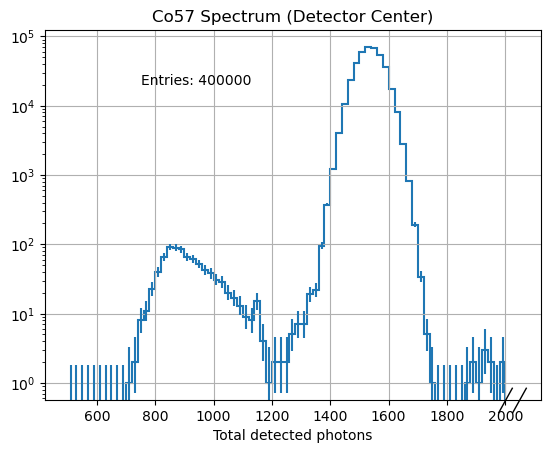

In [11]:
ly = Hist(hist.axis.Regular(75, 500, 2000))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Detector Center)")
ax.set_xlabel("Total detected photons")
ax.text(750, 20000, f'Entries: {len(vals):.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
ax.set_yscale('log')
hep.histplot(ly)

In [12]:
fig.savefig("/home/bojohn/LArAnalysis/plots/co75_spectrum_detector_center.png")

In [15]:
with uproot.open("/N/project/ceem_coherent/CENNS750/sim_out/output_comp_outside_vacuum.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    genz = cenns['genz'].array()
    genx = cenns['genx'].array()
    geny = cenns['geny'].array()

In [16]:
z = ak.zip({"en": en, "chans": chans, "top": top, "genx": genx, "geny": geny, "genz": genz}, depth_limit=1)

In [17]:
vals = cut1(z)

In [18]:
vals = np.array(vals)
len(vals[vals > 0])

19698

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f76add72150>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

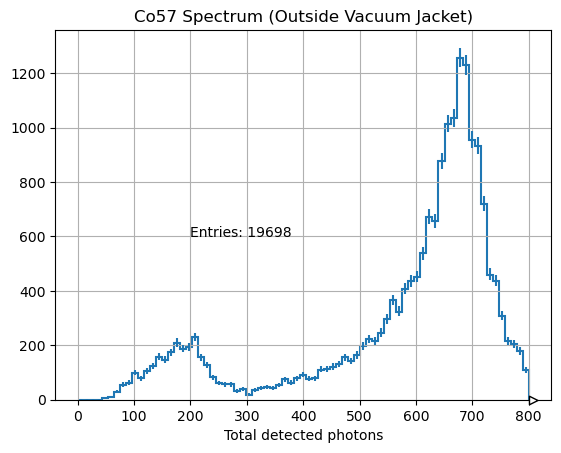

In [19]:
ly = Hist(hist.axis.Regular(75, 0, 800))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Outside Vacuum Jacket)")
ax.set_xlabel("Total detected photons")
ax.text(200, 600, f'Entries: {len(vals):.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly)

In [21]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/co75_spectrum_outside_vacuumjacket.png")

Fit peak to Gaussian

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1632297/3279569608.py:12: SyntaxWarning: invalid escape sequence '\p'
  ax.text(200, 1100, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
/tmp/ipykernel_1632297/3279569608.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax.text(200, 1100, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
/tmp

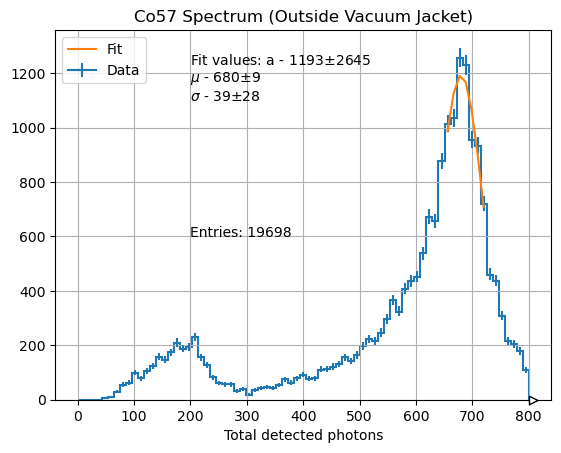

In [22]:
x = ly.axes[0].centers
y = ly.values()
x_data = x[(x > 650) & (x < 725)]
y_data = y[(x > 650) & (x < 725)]
popt, pcov = curve_fit(gaus, x_data, y_data, p0=[1000, 700, 20])
errs = np.diag(pcov)
y_fit = gaus(x_data, *popt)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Outside Vacuum Jacket)")
ax.set_xlabel("Total detected photons")
ax.text(200, 600, f'Entries: {len(vals):.0f}')
ax.text(200, 1100, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly, label='Data')
ax.plot(x_data, y_fit, label='Fit')
ax.legend()

In [23]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/co75_spectrum_outside_vacuumjacket_fit.png")

In [30]:
with uproot.open("/data9/coherent/data/LiqAr/cenns750_sims/1722601/output_comp.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    genz = cenns['genz'].array()
    genx = cenns['genx'].array()
    geny = cenns['geny'].array()

In [31]:
z = ak.zip({"en": en, "chans": chans, "top": top, "genx": genx, "geny": geny, "genz": genz}, depth_limit=1)

In [32]:
vals = cut1(z)

In [33]:
vals = np.array(vals)
len(vals[vals > 0])

8623

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f88c019d420>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

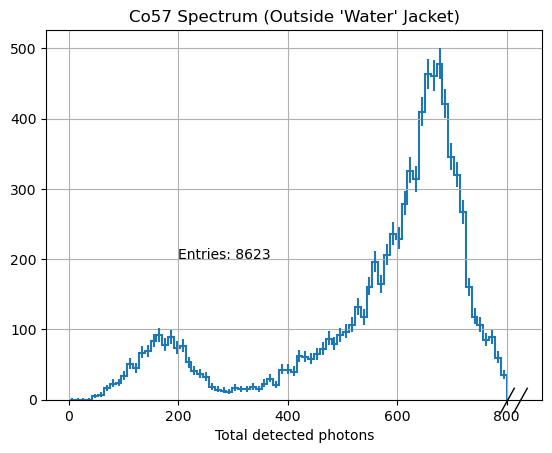

In [34]:
ly = Hist(hist.axis.Regular(75, 0, 800))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Outside 'Water' Jacket)")
ax.set_xlabel("Total detected photons")
ax.text(200, 200, f'Entries: {len(vals):.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly)

In [35]:
fig.savefig("/home/bojohn/LArAnalysis/plots/co75_spectrum_outside_waterjacket.png")

In [3]:
with uproot.open("/data9/coherent/data/LiqAr/cenns750_sims/1728074/output_comp.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    genz = cenns['genz'].array()
    genx = cenns['genx'].array()
    geny = cenns['geny'].array()

In [4]:
z = ak.zip({"en": en, "chans": chans, "top": top, "genx": genx, "geny": geny, "genz": genz}, depth_limit=1)

In [5]:
vals = cut1(z)

In [6]:
vals = np.array(vals)
len(vals[vals > 0])

40000

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f999e3c3a90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

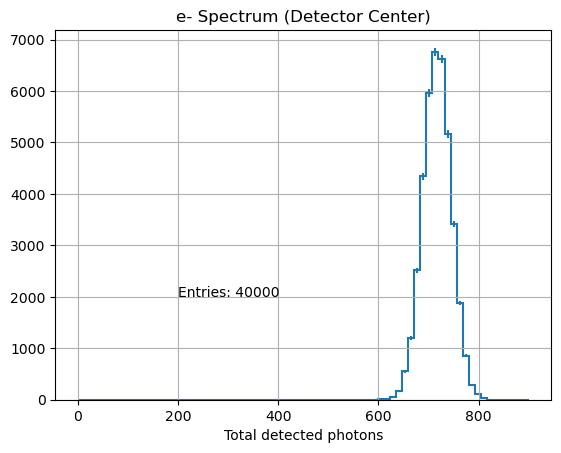

In [9]:
ly = Hist(hist.axis.Regular(75, 0, 900))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("e- Spectrum (Detector Center)")
ax.set_xlabel("Total detected photons")
ax.text(200, 2000, f'Entries: {len(vals):.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly)

In [10]:
fig.savefig("/home/bojohn/LArAnalysis/plots/e-_spectrum_inside.png")

In [42]:
with uproot.open("/N/project/ceem_coherent/CENNS750/sim_out/output_comp_sealed.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()

In [43]:
z = ak.zip({"en": en, "chans": chans, "top": top}, depth_limit=1)

In [44]:
vals = cut1(z)

In [45]:
vals = np.array(vals)
len(vals[vals > 0])

38449

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f76ac82a360>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

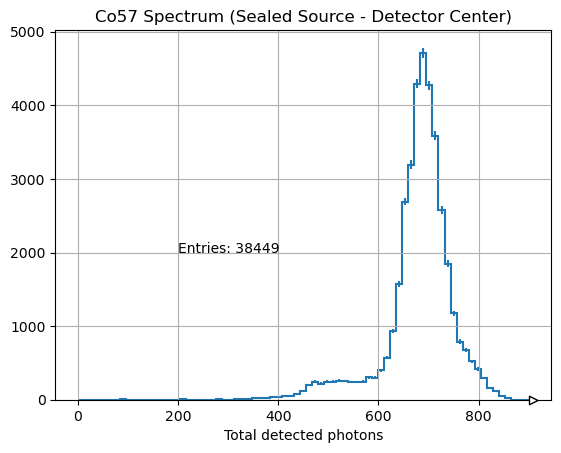

In [46]:
ly = Hist(hist.axis.Regular(75, 0, 900))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Sealed Source - Detector Center)")
ax.set_xlabel("Total detected photons")
ax.text(200, 2000, f'Entries: {len(vals):.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly)

In [47]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/co57_spectrum_sealed.png")

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1632297/3441188557.py:12: SyntaxWarning: invalid escape sequence '\p'
  ax.text(200, 4000, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
/tmp/ipykernel_1632297/3441188557.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax.text(200, 4000, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
/tmp

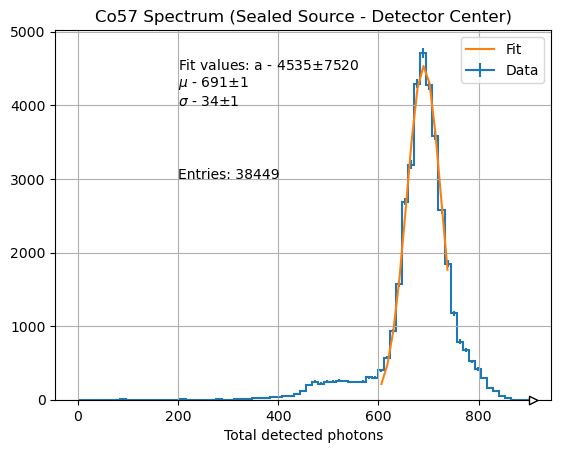

In [54]:
x = ly.axes[0].centers
y = ly.values()
x_data = x[(x > 600) & (x < 750)]
y_data = y[(x > 600) & (x < 750)]
popt, pcov = curve_fit(gaus, x_data, y_data, p0=[1000, 700, 20])
errs = np.diag(pcov)
y_fit = gaus(x_data, *popt)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Sealed Source - Detector Center)")
ax.set_xlabel("Total detected photons")
ax.text(200, 3000, f'Entries: {len(vals):.0f}')
ax.text(200, 4000, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly, label='Data')
ax.plot(x_data, y_fit, label='Fit')
ax.legend()

In [55]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/co57_spectrum_sealed_fit.png")

In [24]:
with uproot.open("/N/project/ceem_coherent/CENNS750/sim_out/3771784/output_comp.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    genz = cenns['genz'].array()
    genx = cenns['genx'].array()
    geny = cenns['geny'].array()

In [25]:
z = ak.zip({"en": en, "chans": chans, "top": top, "genx": genx, "geny": geny, "genz": genz}, depth_limit=1)

In [26]:
vals = cut1(z)

In [27]:
vals = np.array(vals)
len(vals[vals > 0])

19799

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f76b5fe3650>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

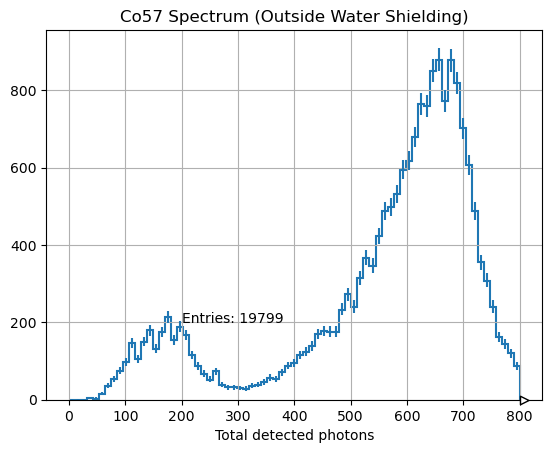

In [28]:
ly = Hist(hist.axis.Regular(75, 0, 800))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Outside Water Shielding)")
ax.set_xlabel("Total detected photons")
ax.text(200, 200, f'Entries: {len(vals):.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly)

In [29]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/co75_spectrum_outside_shielding2.png")

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1632297/3303851131.py:12: SyntaxWarning: invalid escape sequence '\p'
  ax.text(200, 700, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
/tmp/ipykernel_1632297/3303851131.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax.text(200, 700, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
/tmp/i

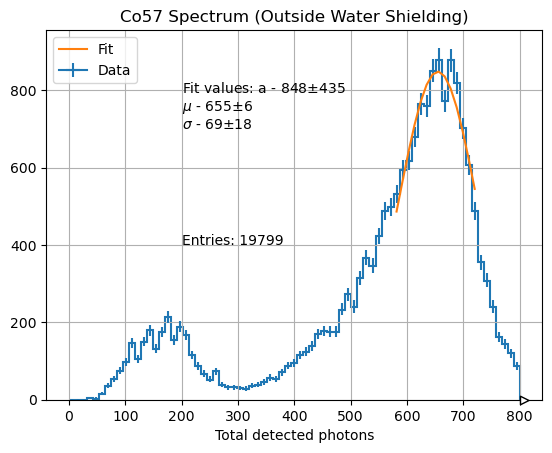

In [32]:
x = ly.axes[0].centers
y = ly.values()
x_data = x[(x > 575) & (x < 725)]
y_data = y[(x > 575) & (x < 725)]
popt, pcov = curve_fit(gaus, x_data, y_data, p0=[1000, 700, 20])
errs = np.diag(pcov)
y_fit = gaus(x_data, *popt)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Outside Water Shielding)")
ax.set_xlabel("Total detected photons")
ax.text(200, 400, f'Entries: {len(vals):.0f}')
ax.text(200, 700, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly, label='Data')
ax.plot(x_data, y_fit, label='Fit')
ax.legend()

In [33]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/co75_spectrum_outside_shielding_fit.png")

In [56]:
with uproot.open("/N/project/ceem_coherent/CENNS750/sim_out/3803795/output_comp.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    genz = cenns['genz'].array()
    genx = cenns['genx'].array()
    geny = cenns['geny'].array()

In [57]:
z = ak.zip({"en": en, "chans": chans, "top": top, "genx": genx, "geny": geny, "genz": genz}, depth_limit=1)

In [58]:
vals = cut1(z)

In [59]:
vals = np.array(vals)
len(vals[vals > 0])

24147

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f76ac962000>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

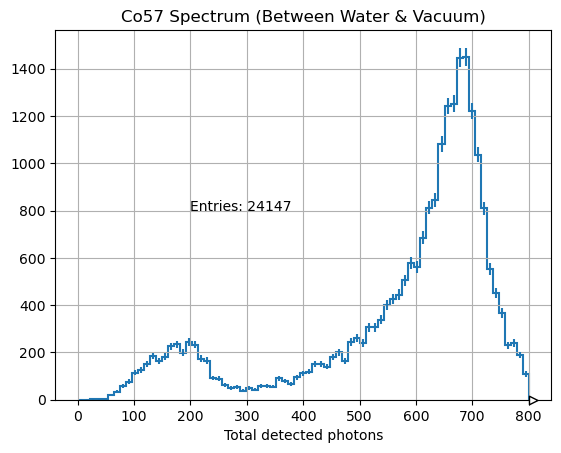

In [60]:
ly = Hist(hist.axis.Regular(75, 0, 800))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Between Water & Vacuum)")
ax.set_xlabel("Total detected photons")
ax.text(200, 800, f'Entries: {len(vals):.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly)

In [61]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/co75_spectrum_between.png")

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1632297/1687252176.py:12: SyntaxWarning: invalid escape sequence '\p'
  ax.text(200, 700, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
/tmp/ipykernel_1632297/1687252176.py:12: SyntaxWarning: invalid escape sequence '\m'
  ax.text(200, 700, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
/tmp/i

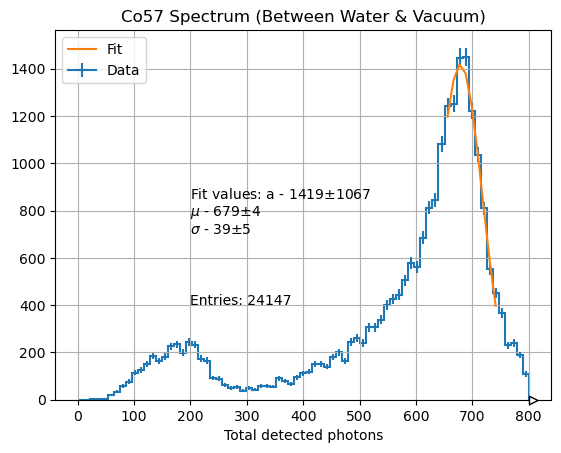

In [63]:
x = ly.axes[0].centers
y = ly.values()
x_data = x[(x > 650) & (x < 750)]
y_data = y[(x > 650) & (x < 750)]
popt, pcov = curve_fit(gaus, x_data, y_data, p0=[1000, 700, 20])
errs = np.diag(pcov)
y_fit = gaus(x_data, *popt)
fig, ax = plt.subplots()
ax.set_title("Co57 Spectrum (Between Water & Vacuum)")
ax.set_xlabel("Total detected photons")
ax.text(200, 400, f'Entries: {len(vals):.0f}')
ax.text(200, 700, f'Fit values: a - {popt[0]:.0f}$\pm${errs[0]:.0f}\n$\mu$ - {popt[1]:.0f}$\pm${errs[1]:.0f}\n$\sigma$ - {popt[2]:.0f}$\pm${errs[2]:.0f}')
# ax.text(100, 600, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ax.grid()
hep.histplot(ly, label='Data')
ax.plot(x_data, y_fit, label='Fit')
ax.legend()

In [41]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/co75_spectrum_between_fit.png")